# Оцените вариабельность данных о цене товара
## Условие задачи

Вы работаете в компании, которая занимается продажей товаров. Вам нужно оценить вариабельность цены. 

**Цель проекта:**
Оценить основные характеристики цены товара: среднее, стандартное отклонение, размах, квартили.

**Алгоритм решения:**

1. Загрузите данные из CSV-файла и ознакомьтесь с их структурой. 
2. Проведите предварительный анализ данных, включающий проверку наличия пропущенных значений.
3. Оцените основные статистические характеристики данных, такие как среднее значение, стандартное отклонение, размах, квартили.
4. Визуализируйте данные, чтобы получить представление о вариабельности и распределении данных.
5. Сделайте выводы на основе проведенного анализа.

**Пример входных данных (sales_data.csv):**

[data.csv](https://github.com/Eduson-DataScience/DataScience/blob/main/EDA-Practice/Evaluate%20the%20variability%20of%20product%20price%20data/data.csv)

# Подсказки

- Используйте библиотеки Pandas, NumPy и Matplotlib для загрузки, обработки и визуализации данных.
- Документируйте каждый шаг анализа данных и комментируйте результаты для лучшего понимания вашего подхода и выводов.
- Используйте графические инструменты, такие как гистограммы и ящик с усами, для визуализации данных и выявления особенностей и вариабельности.
- Выводите и анализируйте основные статистические характеристики данных, чтобы оценить их вариабельность и распределение.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [8]:
# загрузим данные и посмотрим их структуру
data = pd.read_csv('data.csv')
data.head()

,Price,Value
0,10,2
1,15,25
2,20,3
3,25,35
4,3,4


In [43]:
data['Price']

0     10
1     15
2     20
3     25
4      3
5     17
6      1
7     15
8     13
9     11
10    14
11     9
12    11
13    14
14    24
15    28
16     3
17    18
18     2
19    19
Name: Price, dtype: int64

In [10]:
data.describe()

,Price,Value
count,20.000000,20.0000
mean,13.600000,14.6000
std,7.666743,11.1185
min,1.000000,2.0000
25%,9.750000,4.0000
50%,14.000000,13.0000
75%,18.250000,25.0000
max,28.000000,35.0000


In [20]:
def columnValues(data):
    row = [data.nunique(), (data == 0).sum(axis=0), data.isna().sum(), round(data.isna().sum() / len(data) * 100, 1), data.dtypes]
    return row

data_table = []
for column in data:
    data_table.append([column] + columnValues(data[column]))

print(tabulate(data_table, headers=['название', 'к-во уник знач', 'к-во 0-ых знач', 'пустые','% пустых', 'тип данн'], tablefmt='orgtbl'))

| название   |   к-во уник знач |   к-во 0-ых знач |   пустые |   % пустых | тип данн   |
|------------+------------------+------------------+----------+------------+------------|
| Price      |               16 |                0 |        0 |          0 | int64      |
| Value      |               12 |                0 |        0 |          0 | int64      |


In [25]:
num_rows = len(data)
num_columns = len(data.columns)
print("Количество строк:", num_rows)
print("Количество столбцов:", num_columns)

# b. Размер DataFrame в оперативной памяти
memory_usage = data.memory_usage().sum()
print("Размер DataFrame в памяти:", memory_usage, "байт")

# c. Анализ интервальных переменных
numerical_columns = data.select_dtypes(include=[int, float]).columns
for column in numerical_columns:
    print("Статистика для столбца", column)
    print ("стандартное отклонение", data[column].std())
    print("Минимальное значение:", data[column].min())
    print("Медиана:", data[column].median())
    print("Среднее значение:", data[column].mean())
    print("Максимальное значение:", data[column].max())
    print("10-й персентиль:", data[column].quantile(0.1))
    print("25-й персентиль:", data[column].quantile(0.25))
    print("75-й персентиль:", data[column].quantile(0.75))
    print("90-й персентиль:", data[column].quantile(0.9))
    print("----------------------------------------------")
    # выводим только первую колонку Price
    break

Количество строк: 20
Количество столбцов: 2
Размер DataFrame в памяти: 452 байт
Статистика для столбца Price
стандартное отклонение 7.666742943937867
Минимальное значение: 1
Медиана: 14.0
Среднее значение: 13.6
Максимальное значение: 28
10-й персентиль: 2.9000000000000004
25-й персентиль: 9.75
75-й персентиль: 18.25
90-й персентиль: 24.1
----------------------------------------------


<Axes: xlabel='Price'>

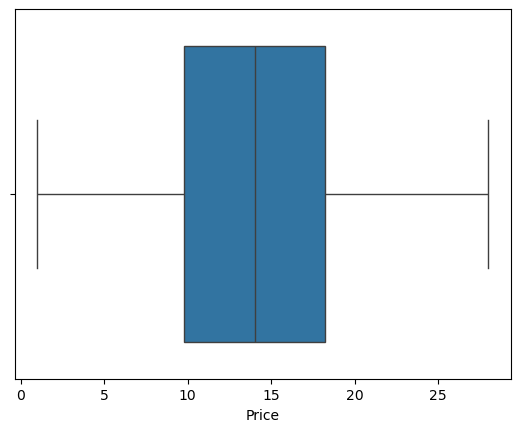

In [59]:
sns.boxplot(x = data['Price'])

<Axes: ylabel='Price'>

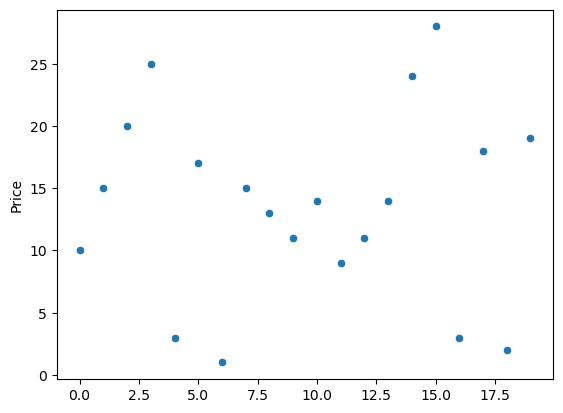

In [63]:
sns.scatterplot(data=data['Price'])